In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tabulate import tabulate
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
EV_df1 = pd.read_excel("E:\QUB\Analytathon 1\WB1_Energia_Challenge_March_2023_Data.xlsx","Data1")
EV_df2 = pd.read_excel("E:\QUB\Analytathon 1\WB2_Energia_Challenge_March_2023_Data.xlsx","Data2")

In [3]:
#Combininig two DataFrame objects with identical columns
combined_EV_df = pd.concat([EV_df1, EV_df2])
combined_EV_df

,accountID,StartDate,ContractStartDateEV,contractStartDate,contractEndDate,saStatus,agedBand,signedUpGroup,title,mosaicType,...,bill_4_2021,bill_5_2021,bill_6_2021,bill_1_2022,bill_2_2022,bill_3_2022,bill_4_2022,bill_5_2022,bill_6_2022,bill_1_2023
0,0,2022-05-03,NaT,2022-05-03,2023-05-03,Active,41 to 50,PCW,Mr,NaN,...,0.0,0.0,0.0,0.0,0.0,581.0,542.0,696.0,0.0,2813.0
1,1,2018-03-09,NaT,2023-03-14,2024-03-14,Active,Unclassified,Telesales,Ms,F17,...,926.0,1131.0,1081.0,1200.0,1179.0,1182.0,985.0,917.0,983.0,1130.0
2,2,2022-01-14,NaT,2023-01-15,2024-01-15,Active,Unclassified,Other,Mr,G18,...,0.0,0.0,0.0,381.0,706.0,629.0,681.0,848.0,1455.0,0.0
3,3,2021-03-23,NaT,2021-03-23,2022-03-23,Active,41 to 50,Other,Mrs,K31,...,348.0,343.0,456.0,470.0,381.0,364.0,333.0,397.0,407.0,526.0
4,4,2020-10-29,NaT,2021-10-30,2022-10-30,Active,Unclassified,Telesales,Mr,NaN,...,663.0,265.0,313.0,497.0,183.0,250.0,234.0,381.0,358.0,233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86553,186553,2022-05-19,NaT,2022-05-19,2023-05-19,Active,Unclassified,Web,Mr,NaN,...,0.0,0.0,0.0,0.0,0.0,314.0,728.0,863.0,1024.0,1115.0
86554,186554,2016-04-22,NaT,2016-04-22,2017-04-22,Active,Unclassified,Other,,G19,...,69.0,77.0,73.0,82.0,69.0,56.0,81.0,62.0,84.0,44.0
86555,186555,2022-11-17,NaT,2022-11-17,2023-11-17,Active,25 to 40,Other,Mr,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.0,242.0
86556,186556,2021-01-02,NaT,2023-03-16,2024-03-16,Active,25 to 40,Web,Ms,J29,...,526.0,1156.0,835.0,884.0,0.0,723.0,1151.0,551.0,1011.0,924.0


In [4]:
#Filtering data where EV = "yes" 
filtered_df_EV_Yes = combined_EV_df.loc[(combined_EV_df['EV']=='Y')]
filtered_df_EV_Yes 
#There are a total of 2516 EV users.

,accountID,StartDate,ContractStartDateEV,contractStartDate,contractEndDate,saStatus,agedBand,signedUpGroup,title,mosaicType,...,bill_4_2021,bill_5_2021,bill_6_2021,bill_1_2022,bill_2_2022,bill_3_2022,bill_4_2022,bill_5_2022,bill_6_2022,bill_1_2023
49,49,2022-09-19,2022-09-19,2022-09-19,2023-09-19,Active,Unclassified,Web,Mrs,C08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,617.0,716.0
135,135,2021-09-14,2021-09-14,2022-10-05,2023-10-05,Active,Unclassified,Web,Mr,K31,...,0.0,617.0,1131.0,1903.0,1278.0,959.0,797.0,0.0,0.0,2691.0
175,175,2019-03-28,2022-11-29,2022-11-29,2023-11-29,Active,Unclassified,Other,,J28,...,731.0,742.0,1215.0,2338.0,1611.0,1088.0,708.0,658.0,849.0,3629.0
193,193,2021-03-10,2022-03-10,2023-03-11,2024-03-11,Active,Unclassified,PCW,Mrs,J28,...,1032.0,807.0,905.0,918.0,0.0,1213.0,1276.0,997.0,0.0,859.0
218,218,2021-05-17,2021-05-17,2021-05-17,2022-05-17,Active,Unclassified,Web,Mr,D10,...,974.0,1228.0,1525.0,1541.0,1196.0,989.0,703.0,0.0,659.0,2633.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86270,186270,2017-01-18,2022-04-13,2022-04-13,2023-04-13,Active,Unclassified,PCW,Ms,G18,...,0.0,353.0,393.0,1120.0,514.0,945.0,850.0,2202.0,1769.0,2298.0
86325,186325,2022-06-21,2022-06-21,2022-06-21,2023-06-21,Active,51 to 60,Field Sales,Mrs,G18,...,0.0,0.0,0.0,0.0,0.0,0.0,329.0,594.0,947.0,943.0
86415,186415,2022-12-30,2022-12-30,2022-12-30,2023-12-30,Active,Unclassified,Web,Ms,F15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86443,186443,2019-02-22,2022-06-09,2022-06-09,2023-06-09,Active,Unclassified,Web,Mr,J28,...,102.0,184.0,799.0,1530.0,622.0,136.0,158.0,0.0,0.0,3029.0


# Exploratory Data Analysis

In [5]:
combined_EV_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186558 entries, 0 to 86557
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   accountID            186558 non-null  int64         
 1   StartDate            186558 non-null  datetime64[ns]
 2   ContractStartDateEV  2516 non-null    datetime64[ns]
 3   contractStartDate    185981 non-null  datetime64[ns]
 4   contractEndDate      185591 non-null  datetime64[ns]
 5   saStatus             186558 non-null  object        
 6   agedBand             186552 non-null  object        
 7   signedUpGroup        186558 non-null  object        
 8   title                186556 non-null  object        
 9   mosaicType           144036 non-null  object        
 10  EV                   186558 non-null  object        
 11  EV_New_or_Old        186558 non-null  object        
 12  bill_1_2021          186558 non-null  float64       
 13  bill_2_2021    

In [6]:
combined_EV_df.nunique()

accountID              186558
StartDate                3257
ContractStartDateEV       565
contractStartDate        3245
contractEndDate          3567
saStatus                    1
agedBand                    8
signedUpGroup               6
title                       9
mosaicType                 43
EV                          2
EV_New_or_Old               3
bill_1_2021              4457
bill_2_2021              5054
bill_3_2021              4386
bill_4_2021              3889
bill_5_2021              3712
bill_6_2021              4256
bill_1_2022              4926
bill_2_2022              4935
bill_3_2022              4495
bill_4_2022              3871
bill_5_2022              3733
bill_6_2022              4041
bill_1_2023              5092
dtype: int64

In [7]:
#To summarise the given data
combined_EV_df.describe()

,accountID,bill_1_2021,bill_2_2021,bill_3_2021,bill_4_2021,bill_5_2021,bill_6_2021,bill_1_2022,bill_2_2022,bill_3_2022,bill_4_2022,bill_5_2022,bill_6_2022,bill_1_2023
count,186558.000000,186558.000000,186558.000000,186558.000000,186558.000000,186558.000000,186558.000000,186558.000000,186558.000000,186558.000000,186558.000000,186558.000000,186558.00000,186558.000000
mean,93278.500000,466.917100,562.115112,513.730224,466.354419,463.413131,577.303464,725.422035,677.365972,651.451716,564.719367,568.517256,688.35377,920.319896
std,53854.800097,718.094048,808.298450,667.484855,562.397514,534.612340,635.093880,786.465344,741.113552,640.593475,519.753992,485.238007,557.31486,758.626605
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,46639.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,219.000000,249.000000,284.000000,352.00000,451.000000
50%,93278.500000,0.000000,221.000000,350.000000,374.000000,387.000000,488.000000,596.000000,549.000000,548.000000,490.000000,497.000000,594.00000,746.000000
75%,139917.750000,806.000000,876.000000,817.000000,732.000000,721.000000,872.000000,1068.000000,957.000000,892.000000,755.000000,746.000000,893.00000,1165.000000
max,186557.000000,8914.000000,9599.000000,9191.000000,9654.000000,9499.000000,8376.000000,9361.000000,9551.000000,9840.000000,8843.000000,8643.000000,9117.00000,9333.000000


<AxesSubplot:>

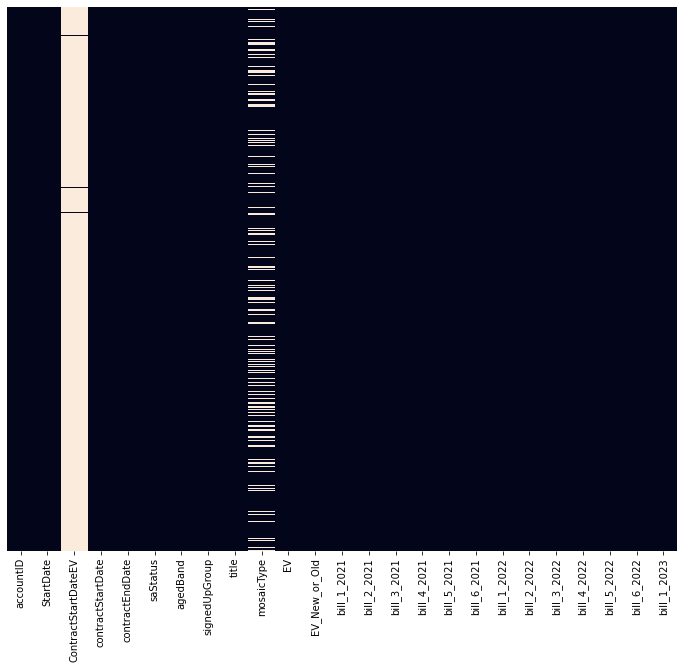

In [9]:
#heatmap to get an overview of the null values present in the data.
plt.figure(figsize=(12, 10))
sns.heatmap(combined_EV_df.isna(),yticklabels = False, cbar = False)

From the above heatmap we see that most of the null values are present in the column'ContractStratDateEV' and 'Mosaic type'

In [10]:
corr_matrix = combined_EV_df.corr()
corr_matrix

,accountID,bill_1_2021,bill_2_2021,bill_3_2021,bill_4_2021,bill_5_2021,bill_6_2021,bill_1_2022,bill_2_2022,bill_3_2022,bill_4_2022,bill_5_2022,bill_6_2022,bill_1_2023
accountID,1.000000,-0.004648,-0.004939,-0.004642,-0.002633,-0.002607,-0.003523,-0.006885,-0.006120,-0.006646,-0.004010,-0.002028,-0.007669,-0.005388
bill_1_2021,-0.004648,1.000000,0.579474,0.575120,0.513700,0.470447,0.471830,0.479569,0.421915,0.375626,0.307680,0.284377,0.289155,0.270926
bill_2_2021,-0.004939,0.579474,1.000000,0.601177,0.556579,0.512584,0.539382,0.524491,0.491821,0.440160,0.326462,0.308689,0.323371,0.326461
bill_3_2021,-0.004642,0.575120,0.601177,1.000000,0.646403,0.625016,0.621883,0.572497,0.540120,0.531775,0.424750,0.387334,0.386093,0.345154
bill_4_2021,-0.002633,0.513700,0.556579,0.646403,1.000000,0.676867,0.686551,0.574055,0.529477,0.550759,0.513106,0.470485,0.413394,0.326207
bill_5_2021,-0.002607,0.470447,0.512584,0.625016,0.676867,1.000000,0.672600,0.576625,0.540891,0.554660,0.527607,0.505680,0.440412,0.323963
bill_6_2021,-0.003523,0.471830,0.539382,0.621883,0.686551,0.672600,1.000000,0.636987,0.638680,0.612204,0.524718,0.502720,0.501301,0.417734
bill_1_2022,-0.006885,0.479569,0.524491,0.572497,0.574055,0.576625,0.636987,1.000000,0.636471,0.616769,0.464715,0.434248,0.472163,0.493296
bill_2_2022,-0.006120,0.421915,0.491821,0.540120,0.529477,0.540891,0.638680,0.636471,1.000000,0.614259,0.484459,0.468362,0.504360,0.500014
bill_3_2022,-0.006646,0.375626,0.440160,0.531775,0.550759,0.554660,0.612204,0.616769,0.614259,1.000000,0.565370,0.565501,0.545264,0.492739


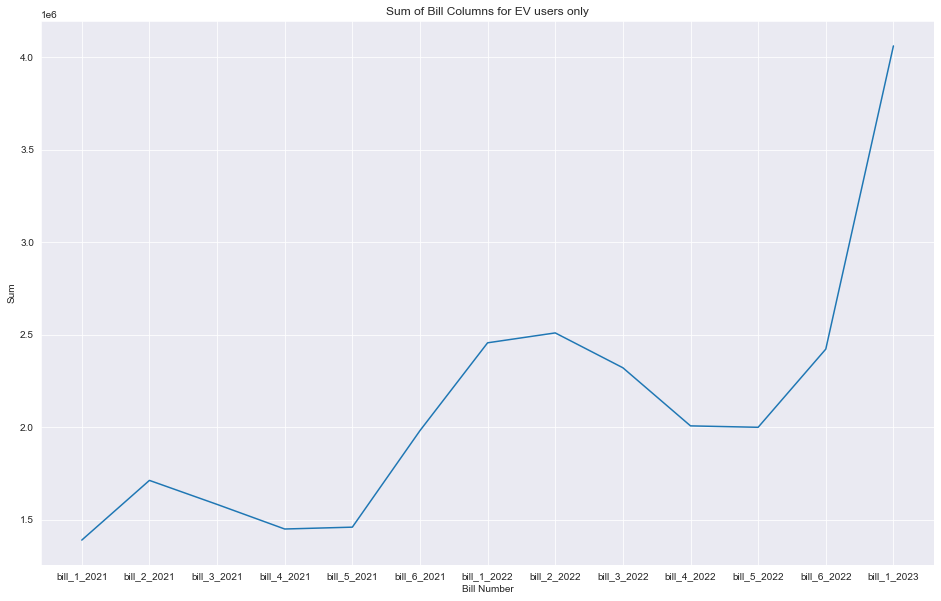

In [70]:
# line chart for EV user only.
EV_customers = combined_EV_df[combined_EV_df['EV'] == 'Y']
EV_bill_sums = EV_customers.loc[:, 'bill_1_2021':'bill_1_2023'].sum()

fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x=EV_bill_sums.index, y=EV_bill_sums.values, ax=ax)

ax.set_title('Sum of Bill Columns for EV users only')
ax.set_xlabel('Bill Number')
ax.set_ylabel('Sum')

plt.show()

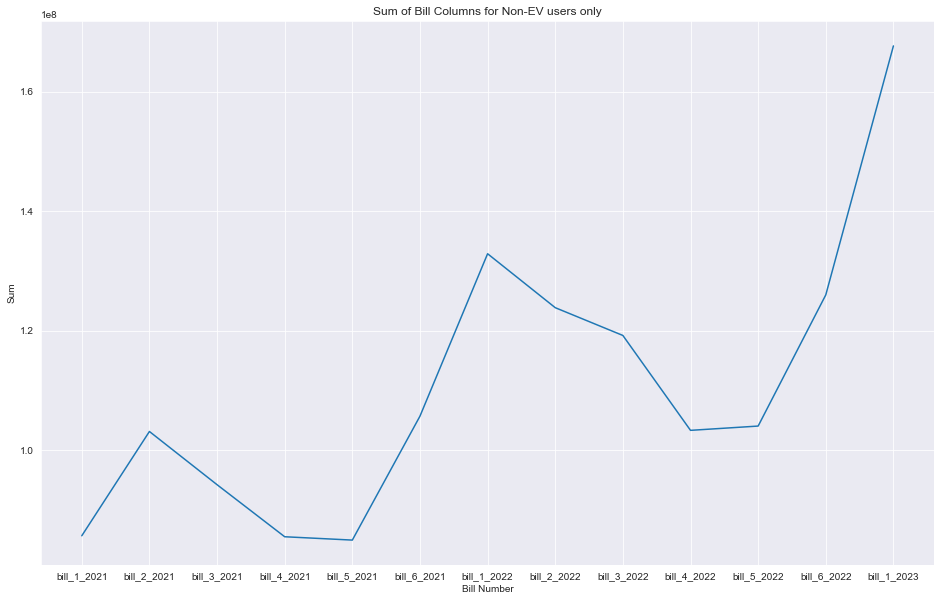

In [71]:
# line chart for  Non- EV user only.
EV_customers = combined_EV_df[combined_EV_df['EV'] == 'N']
EV_bill_sums = EV_customers.loc[:, 'bill_1_2021':'bill_1_2023'].sum()

fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x=EV_bill_sums.index, y=EV_bill_sums.values, ax=ax)

ax.set_title('Sum of Bill Columns for Non-EV users only')
ax.set_xlabel('Bill Number')
ax.set_ylabel('Sum')

plt.show()

In [13]:
# Group the data by mosaicType and calculate the total number of users in each group
grouped1 = combined_EV_df.groupby('mosaicType')['EV'].agg(['count'])

# Calculate the number of EV owners in each mosaicType
grouped1['EV'] = combined_EV_df[combined_EV_df['EV'] == 'Y'].groupby('mosaicType')['EV'].agg(['count'])

# Calculate the percentage of EV owners in each mosaicType
grouped1['Percentage'] = grouped1['EV'] / grouped1['count'] * 100

# Reset the index to make the mosaicTypea column
grouped1 = grouped1.reset_index()

# Display the resulting dataframe
print(grouped1)

   mosaicType  count   EV  Percentage
0         A01   4259   59    1.385302
1         A02   3659  105    2.869637
2         A03   5368   72    1.341282
3         B04   4723   88    1.863223
4         B05   4426   68    1.536376
5         B06   4024   20    0.497018
6         C07   4011   26    0.648217
7         C08   3059   17    0.555737
8         C09   1845   16    0.867209
9         D10   2102    8    0.380590
10        D11   2045   16    0.782396
11        D12    237    2    0.843882
12        E13   1391   12    0.862689
13        E14   3138   21    0.669216
14        F15   6201   63    1.015965
15        F16   5203   65    1.249279
16        F17   4281   44    1.027797
17        G18   6288   80    1.272265
18        G19   5472   67    1.224415
19        G20   3199   27    0.844014
20        H21   1877   13    0.692595
21        H22   1888   12    0.635593
22        H23   1015    7    0.689655
23        I24   1166    9    0.771870
24        I25    518    4    0.772201
25        J2

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

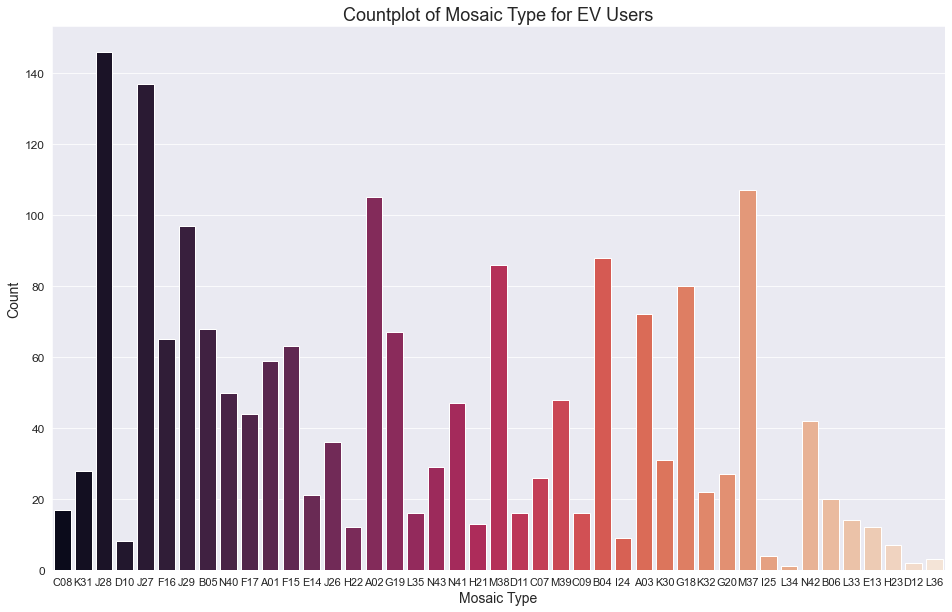

In [14]:
plt.figure(figsize=(16, 10))
sns.set_style('darkgrid')
sns.countplot(x ='mosaicType', data =filtered_df_EV_Yes,palette="rocket", ax=plt.gca())
plt.title("Countplot of Mosaic Type for EV Users",fontsize=18)
plt.ylabel("Count", fontsize=14)
plt.xlabel("Mosaic Type", fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=12)

From the above countplot we infer that the maximum EV users belong to the J28 while the minimum belong to L34.

In [15]:
# Group the data by age band and calculate the total number of users in each group
grouped = combined_EV_df.groupby('agedBand')['EV'].agg(['count'])

# Calculate the number of EV owners in each age band
grouped['EV'] = combined_EV_df[combined_EV_df['EV'] == 'Y'].groupby('agedBand')['EV'].agg(['count'])

# Calculate the percentage of EV owners in each age band
grouped['Percentage'] = grouped['EV'] / grouped['count'] * 100

# Reset the index to make the age band a column
grouped = grouped.reset_index()

# Display the resulting dataframe
print(grouped)

       agedBand   count      EV  Percentage
0    18 & Under       8     NaN         NaN
1      19 to 24     649     2.0    0.308166
2      25 to 40   19632   215.0    1.095151
3      41 to 50   19708   314.0    1.593262
4      51 to 60   15341   231.0    1.505769
5      61 to 70   10878   131.0    1.204265
6           70+    8285    61.0    0.736270
7  Unclassified  112051  1562.0    1.394008


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

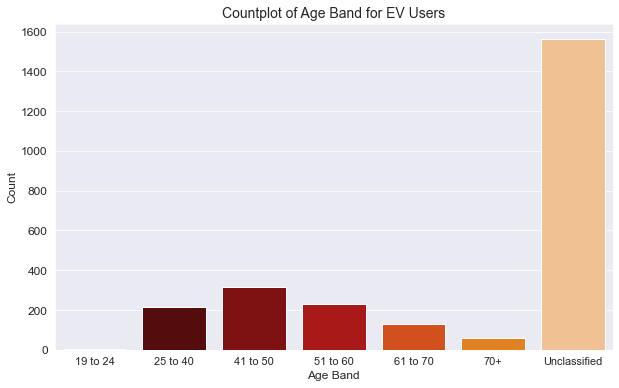

In [16]:
plt.figure(figsize=(10, 6))#setting the entire plot size
sns.set_style('darkgrid')
order = ["19 to 24", "25 to 40", "41 to 50", "51 to 60","61 to 70","70+","Unclassified"]
sns.countplot(x ='agedBand', data =filtered_df_EV_Yes,palette="gist_heat", ax=plt.gca(), order = order)
plt.title("Countplot of Age Band for EV Users",fontsize=14)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Age Band", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=12)

In [17]:
# Group the data by title and calculate the total number of users in each group
grouped2 = combined_EV_df.groupby('title')['EV'].agg(['count'])

# Calculate the number of EV owners in each title
grouped2['EV'] = combined_EV_df[combined_EV_df['EV'] == 'Y'].groupby('title')['EV'].agg(['count'])

# Calculate the percentage of EV owners in each title
grouped2['Percentage'] = grouped2['EV'] / grouped2['count'] * 100
# Reset the index to make the title a column
grouped2 = grouped2.reset_index()

# Display the resulting dataframe
print(grouped2)

      title  count      EV  Percentage
0             8540    87.0    1.018735
1      Cllr      1     NaN         NaN
2        Dr   1204    37.0    3.073090
3      Miss   5365    19.0    0.354147
4        Mr  98638  1716.0    1.739695
5  Mr & Mrs      3     NaN         NaN
6       Mrs  33940   359.0    1.057749
7        Ms  38858   298.0    0.766895
8       Rev      7     NaN         NaN


(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

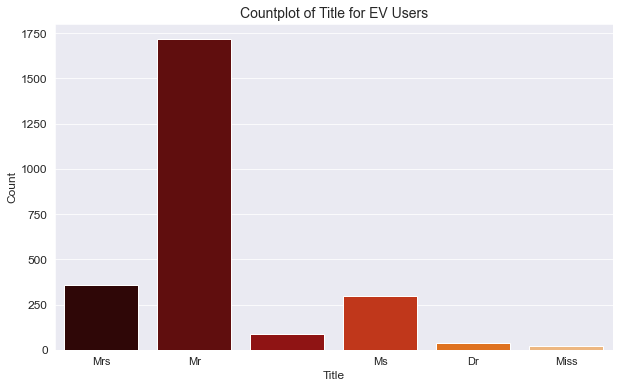

In [18]:
plt.figure(figsize=(10, 6))#setting the entire plot size
sns.set_style('darkgrid')

sns.countplot(x ='title', data =filtered_df_EV_Yes,palette="gist_heat", ax=plt.gca())
plt.title("Countplot of Title for EV Users",fontsize=14)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Title", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=12)

In [19]:
# Group the data by age band and calculate the total number of users in each group
grouped3 = combined_EV_df.groupby('signedUpGroup')['EV'].agg(['count'])

# Calculate the number of EV owners in each age band
grouped3['EV'] = combined_EV_df[combined_EV_df['EV'] == 'Y'].groupby('signedUpGroup')['EV'].agg(['count'])

# Calculate the percentage of EV owners in each age band
grouped3['Percentage'] = grouped3['EV'] / grouped3['count'] * 100
# Reset the index to make the age band a column
grouped3 = grouped3.reset_index()

# Display the resulting dataframe
print(grouped3)

  signedUpGroup  count   EV  Percentage
0   Field Sales  35919  158    0.439879
1           OBS   8075   67    0.829721
2         Other  43523  506    1.162604
3           PCW  31491  418    1.327363
4     Telesales  39685  584    1.471589
5           Web  27865  783    2.809977


(array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

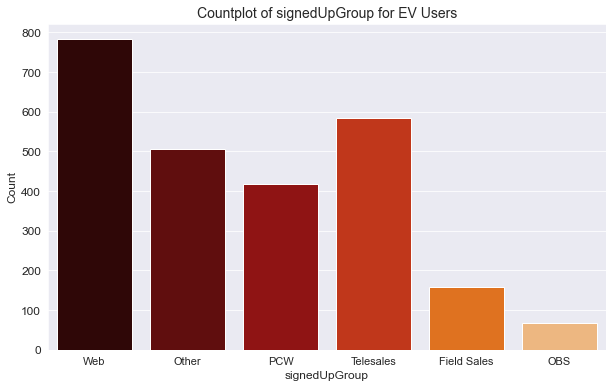

In [20]:
plt.figure(figsize=(10, 6))#setting the entire plot size
sns.set_style('darkgrid')

sns.countplot(x ='signedUpGroup', data =filtered_df_EV_Yes,palette="gist_heat", ax=plt.gca())
plt.title("Countplot of signedUpGroup for EV Users",fontsize=14)
plt.ylabel("Count", fontsize=12)
plt.xlabel("signedUpGroup", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=12)

# Cleaning the Data

In [21]:
#selecting rows where the billing columns contain 0 for all the 13 billing cloumns.
rows_to_drop_new_df = combined_EV_df.loc[(combined_EV_df.loc[:, 'bill_1_2021':'bill_1_2023'] == 0).all(axis=1)]
rows_to_drop_new_df

,accountID,StartDate,ContractStartDateEV,contractStartDate,contractEndDate,saStatus,agedBand,signedUpGroup,title,mosaicType,...,bill_4_2021,bill_5_2021,bill_6_2021,bill_1_2022,bill_2_2022,bill_3_2022,bill_4_2022,bill_5_2022,bill_6_2022,bill_1_2023
69,69,2023-01-04,NaT,2023-01-04,2024-01-04,Active,25 to 40,Web,Mr,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,127,2023-01-16,NaT,2023-01-16,2024-01-16,Active,25 to 40,Other,Mrs,G20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176,176,2023-02-22,NaT,2023-02-22,2024-02-22,Active,Unclassified,Field Sales,Mr,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
518,518,2023-01-18,2023-01-18,2023-01-18,2024-01-18,Active,Unclassified,Web,Mr,J29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
571,571,2022-05-28,NaT,2022-05-28,2023-05-28,Active,25 to 40,PCW,Mr,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86333,186333,2022-04-14,NaT,2022-04-14,2023-04-14,Active,Unclassified,Field Sales,Mr,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86359,186359,2023-01-30,NaT,2023-01-30,2024-01-30,Active,41 to 50,Other,Ms,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86363,186363,2023-02-08,NaT,2023-02-08,2024-02-08,Active,Unclassified,Other,Mrs,E14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86415,186415,2022-12-30,2022-12-30,2022-12-30,2023-12-30,Active,Unclassified,Web,Ms,F15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# anti-join combined_EV_df with rows_to_drop_new_df on column accountID
merged = pd.merge(combined_EV_df, rows_to_drop_new_df, on='accountID', how='left', indicator=True)

# creating a dictionary to map old column names to new column names
OG_names = {'StartDate_x' : 'StartDate',
             'ContractStartDateEV_x' : 'ContractStartDateEV',
             'contractStartDate_x' : 'contractStartDate',
             'contractEndDate_x' : 'contractEndDate',
             'saStatus_x' : 'saStatus',
             'agedBand_x' : 'agedBand',
             'signedUpGroup_x' : 'signedUpGroup',
             'title_x' : 'title',
             'mosaicType_x' : 'mosaicType',
             'EV_x' : 'EV',
             'EV_New_or_Old_x':'EV_New_or_Old',
             'bill_1_2021_x' : 'bill_1_2021',
             'bill_2_2021_x' : 'bill_2_2021',
             'bill_3_2021_x' : 'bill_3_2021',
             'bill_4_2021_x' : 'bill_4_2021',
             'bill_5_2021_x' : 'bill_5_2021',
             'bill_6_2021_x' : 'bill_6_2021',
             'bill_1_2022_x' : 'bill_1_2022',
             'bill_2_2022_x' : 'bill_2_2022',
             'bill_3_2022_x' : 'bill_3_2022',
             'bill_4_2022_x' : 'bill_4_2022',
             'bill_5_2022_x' : 'bill_5_2022',
             'bill_6_2022_x' : 'bill_6_2022',
             'bill_1_2023_x' : 'bill_1_2023'}
# filter the rows that are only present in the left dataframe
Final_combined_EV_df = merged.loc[merged['_merge'] == 'left_only', ['accountID', 'StartDate_x','ContractStartDateEV_x','contractStartDate_x',
                                                       'contractEndDate_x','saStatus_x','agedBand_x','signedUpGroup_x','title_x',
                                                       'mosaicType_x','EV_x','EV_New_or_Old_x','bill_1_2021_x','bill_2_2021_x',
                                                       'bill_3_2021_x','bill_4_2021_x','bill_5_2021_x','bill_6_2021_x','bill_1_2022_x',
                                                       'bill_2_2022_x','bill_3_2022_x','bill_4_2022_x','bill_5_2022_x','bill_6_2022_x',
                                                       'bill_1_2023_x']].rename(columns=OG_names)


In [23]:
#printing the final dataframe
Final_combined_EV_df
#The resulting dataframe result contains only the rows from 'combined_EV_df' that are not present in 'rows_to_drop_new_df'.

,accountID,StartDate,ContractStartDateEV,contractStartDate,contractEndDate,saStatus,agedBand,signedUpGroup,title,mosaicType,...,bill_4_2021,bill_5_2021,bill_6_2021,bill_1_2022,bill_2_2022,bill_3_2022,bill_4_2022,bill_5_2022,bill_6_2022,bill_1_2023
0,0,2022-05-03,NaT,2022-05-03,2023-05-03,Active,41 to 50,PCW,Mr,NaN,...,0.0,0.0,0.0,0.0,0.0,581.0,542.0,696.0,0.0,2813.0
1,1,2018-03-09,NaT,2023-03-14,2024-03-14,Active,Unclassified,Telesales,Ms,F17,...,926.0,1131.0,1081.0,1200.0,1179.0,1182.0,985.0,917.0,983.0,1130.0
2,2,2022-01-14,NaT,2023-01-15,2024-01-15,Active,Unclassified,Other,Mr,G18,...,0.0,0.0,0.0,381.0,706.0,629.0,681.0,848.0,1455.0,0.0
3,3,2021-03-23,NaT,2021-03-23,2022-03-23,Active,41 to 50,Other,Mrs,K31,...,348.0,343.0,456.0,470.0,381.0,364.0,333.0,397.0,407.0,526.0
4,4,2020-10-29,NaT,2021-10-30,2022-10-30,Active,Unclassified,Telesales,Mr,NaN,...,663.0,265.0,313.0,497.0,183.0,250.0,234.0,381.0,358.0,233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186553,186553,2022-05-19,NaT,2022-05-19,2023-05-19,Active,Unclassified,Web,Mr,NaN,...,0.0,0.0,0.0,0.0,0.0,314.0,728.0,863.0,1024.0,1115.0
186554,186554,2016-04-22,NaT,2016-04-22,2017-04-22,Active,Unclassified,Other,,G19,...,69.0,77.0,73.0,82.0,69.0,56.0,81.0,62.0,84.0,44.0
186555,186555,2022-11-17,NaT,2022-11-17,2023-11-17,Active,25 to 40,Other,Mr,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.0,242.0
186556,186556,2021-01-02,NaT,2023-03-16,2024-03-16,Active,25 to 40,Web,Ms,J29,...,526.0,1156.0,835.0,884.0,0.0,723.0,1151.0,551.0,1011.0,924.0


# Imputing missing values

In [24]:
# Filling NA values in column agedBand with 'Unclassified'
Final_combined_EV_df['agedBand'].fillna('Unclassified', inplace=True)

In [25]:
Final_combined_EV_df

,accountID,StartDate,ContractStartDateEV,contractStartDate,contractEndDate,saStatus,agedBand,signedUpGroup,title,mosaicType,...,bill_4_2021,bill_5_2021,bill_6_2021,bill_1_2022,bill_2_2022,bill_3_2022,bill_4_2022,bill_5_2022,bill_6_2022,bill_1_2023
0,0,2022-05-03,NaT,2022-05-03,2023-05-03,Active,41 to 50,PCW,Mr,NaN,...,0.0,0.0,0.0,0.0,0.0,581.0,542.0,696.0,0.0,2813.0
1,1,2018-03-09,NaT,2023-03-14,2024-03-14,Active,Unclassified,Telesales,Ms,F17,...,926.0,1131.0,1081.0,1200.0,1179.0,1182.0,985.0,917.0,983.0,1130.0
2,2,2022-01-14,NaT,2023-01-15,2024-01-15,Active,Unclassified,Other,Mr,G18,...,0.0,0.0,0.0,381.0,706.0,629.0,681.0,848.0,1455.0,0.0
3,3,2021-03-23,NaT,2021-03-23,2022-03-23,Active,41 to 50,Other,Mrs,K31,...,348.0,343.0,456.0,470.0,381.0,364.0,333.0,397.0,407.0,526.0
4,4,2020-10-29,NaT,2021-10-30,2022-10-30,Active,Unclassified,Telesales,Mr,NaN,...,663.0,265.0,313.0,497.0,183.0,250.0,234.0,381.0,358.0,233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186553,186553,2022-05-19,NaT,2022-05-19,2023-05-19,Active,Unclassified,Web,Mr,NaN,...,0.0,0.0,0.0,0.0,0.0,314.0,728.0,863.0,1024.0,1115.0
186554,186554,2016-04-22,NaT,2016-04-22,2017-04-22,Active,Unclassified,Other,,G19,...,69.0,77.0,73.0,82.0,69.0,56.0,81.0,62.0,84.0,44.0
186555,186555,2022-11-17,NaT,2022-11-17,2023-11-17,Active,25 to 40,Other,Mr,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.0,242.0
186556,186556,2021-01-02,NaT,2023-03-16,2024-03-16,Active,25 to 40,Web,Ms,J29,...,526.0,1156.0,835.0,884.0,0.0,723.0,1151.0,551.0,1011.0,924.0


In [26]:
# Filling NA values in column mosaicType with 'Unknown'
Final_combined_EV_df['mosaicType'].fillna('Unknown', inplace=True)
Final_combined_EV_df

,accountID,StartDate,ContractStartDateEV,contractStartDate,contractEndDate,saStatus,agedBand,signedUpGroup,title,mosaicType,...,bill_4_2021,bill_5_2021,bill_6_2021,bill_1_2022,bill_2_2022,bill_3_2022,bill_4_2022,bill_5_2022,bill_6_2022,bill_1_2023
0,0,2022-05-03,NaT,2022-05-03,2023-05-03,Active,41 to 50,PCW,Mr,Unknown,...,0.0,0.0,0.0,0.0,0.0,581.0,542.0,696.0,0.0,2813.0
1,1,2018-03-09,NaT,2023-03-14,2024-03-14,Active,Unclassified,Telesales,Ms,F17,...,926.0,1131.0,1081.0,1200.0,1179.0,1182.0,985.0,917.0,983.0,1130.0
2,2,2022-01-14,NaT,2023-01-15,2024-01-15,Active,Unclassified,Other,Mr,G18,...,0.0,0.0,0.0,381.0,706.0,629.0,681.0,848.0,1455.0,0.0
3,3,2021-03-23,NaT,2021-03-23,2022-03-23,Active,41 to 50,Other,Mrs,K31,...,348.0,343.0,456.0,470.0,381.0,364.0,333.0,397.0,407.0,526.0
4,4,2020-10-29,NaT,2021-10-30,2022-10-30,Active,Unclassified,Telesales,Mr,Unknown,...,663.0,265.0,313.0,497.0,183.0,250.0,234.0,381.0,358.0,233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186553,186553,2022-05-19,NaT,2022-05-19,2023-05-19,Active,Unclassified,Web,Mr,Unknown,...,0.0,0.0,0.0,0.0,0.0,314.0,728.0,863.0,1024.0,1115.0
186554,186554,2016-04-22,NaT,2016-04-22,2017-04-22,Active,Unclassified,Other,,G19,...,69.0,77.0,73.0,82.0,69.0,56.0,81.0,62.0,84.0,44.0
186555,186555,2022-11-17,NaT,2022-11-17,2023-11-17,Active,25 to 40,Other,Mr,Unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.0,242.0
186556,186556,2021-01-02,NaT,2023-03-16,2024-03-16,Active,25 to 40,Web,Ms,J29,...,526.0,1156.0,835.0,884.0,0.0,723.0,1151.0,551.0,1011.0,924.0


In [27]:
#Removing Rows containing 'Mr & Mrs' from the column title 
Final_combined_EV_df = Final_combined_EV_df[Final_combined_EV_df['title'] != 'Mr & Mrs']

In [28]:
Final_combined_EV_df

,accountID,StartDate,ContractStartDateEV,contractStartDate,contractEndDate,saStatus,agedBand,signedUpGroup,title,mosaicType,...,bill_4_2021,bill_5_2021,bill_6_2021,bill_1_2022,bill_2_2022,bill_3_2022,bill_4_2022,bill_5_2022,bill_6_2022,bill_1_2023
0,0,2022-05-03,NaT,2022-05-03,2023-05-03,Active,41 to 50,PCW,Mr,Unknown,...,0.0,0.0,0.0,0.0,0.0,581.0,542.0,696.0,0.0,2813.0
1,1,2018-03-09,NaT,2023-03-14,2024-03-14,Active,Unclassified,Telesales,Ms,F17,...,926.0,1131.0,1081.0,1200.0,1179.0,1182.0,985.0,917.0,983.0,1130.0
2,2,2022-01-14,NaT,2023-01-15,2024-01-15,Active,Unclassified,Other,Mr,G18,...,0.0,0.0,0.0,381.0,706.0,629.0,681.0,848.0,1455.0,0.0
3,3,2021-03-23,NaT,2021-03-23,2022-03-23,Active,41 to 50,Other,Mrs,K31,...,348.0,343.0,456.0,470.0,381.0,364.0,333.0,397.0,407.0,526.0
4,4,2020-10-29,NaT,2021-10-30,2022-10-30,Active,Unclassified,Telesales,Mr,Unknown,...,663.0,265.0,313.0,497.0,183.0,250.0,234.0,381.0,358.0,233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186553,186553,2022-05-19,NaT,2022-05-19,2023-05-19,Active,Unclassified,Web,Mr,Unknown,...,0.0,0.0,0.0,0.0,0.0,314.0,728.0,863.0,1024.0,1115.0
186554,186554,2016-04-22,NaT,2016-04-22,2017-04-22,Active,Unclassified,Other,,G19,...,69.0,77.0,73.0,82.0,69.0,56.0,81.0,62.0,84.0,44.0
186555,186555,2022-11-17,NaT,2022-11-17,2023-11-17,Active,25 to 40,Other,Mr,Unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.0,242.0
186556,186556,2021-01-02,NaT,2023-03-16,2024-03-16,Active,25 to 40,Web,Ms,J29,...,526.0,1156.0,835.0,884.0,0.0,723.0,1151.0,551.0,1011.0,924.0


In [29]:
Final_combined_EV_df = Final_combined_EV_df.replace(' ', np.nan)

In [30]:
Final_combined_EV_df

,accountID,StartDate,ContractStartDateEV,contractStartDate,contractEndDate,saStatus,agedBand,signedUpGroup,title,mosaicType,...,bill_4_2021,bill_5_2021,bill_6_2021,bill_1_2022,bill_2_2022,bill_3_2022,bill_4_2022,bill_5_2022,bill_6_2022,bill_1_2023
0,0,2022-05-03,NaT,2022-05-03,2023-05-03,Active,41 to 50,PCW,Mr,Unknown,...,0.0,0.0,0.0,0.0,0.0,581.0,542.0,696.0,0.0,2813.0
1,1,2018-03-09,NaT,2023-03-14,2024-03-14,Active,Unclassified,Telesales,Ms,F17,...,926.0,1131.0,1081.0,1200.0,1179.0,1182.0,985.0,917.0,983.0,1130.0
2,2,2022-01-14,NaT,2023-01-15,2024-01-15,Active,Unclassified,Other,Mr,G18,...,0.0,0.0,0.0,381.0,706.0,629.0,681.0,848.0,1455.0,0.0
3,3,2021-03-23,NaT,2021-03-23,2022-03-23,Active,41 to 50,Other,Mrs,K31,...,348.0,343.0,456.0,470.0,381.0,364.0,333.0,397.0,407.0,526.0
4,4,2020-10-29,NaT,2021-10-30,2022-10-30,Active,Unclassified,Telesales,Mr,Unknown,...,663.0,265.0,313.0,497.0,183.0,250.0,234.0,381.0,358.0,233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186553,186553,2022-05-19,NaT,2022-05-19,2023-05-19,Active,Unclassified,Web,Mr,Unknown,...,0.0,0.0,0.0,0.0,0.0,314.0,728.0,863.0,1024.0,1115.0
186554,186554,2016-04-22,NaT,2016-04-22,2017-04-22,Active,Unclassified,Other,NaN,G19,...,69.0,77.0,73.0,82.0,69.0,56.0,81.0,62.0,84.0,44.0
186555,186555,2022-11-17,NaT,2022-11-17,2023-11-17,Active,25 to 40,Other,Mr,Unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.0,242.0
186556,186556,2021-01-02,NaT,2023-03-16,2024-03-16,Active,25 to 40,Web,Ms,J29,...,526.0,1156.0,835.0,884.0,0.0,723.0,1151.0,551.0,1011.0,924.0


In [31]:
# Mode imputation
mode_title = Final_combined_EV_df['title'].mode().iloc[0]
mode_title

'Mr'

In [32]:
# replacing the nan values of title with the mode of the title column i.e. 'Mr'
Final_combined_EV_df['title'].fillna(mode_title, inplace=True)

In [33]:
# Count the number of missing values in column 'title'
num_missing = Final_combined_EV_df['title'].isna().sum()
print(f"Number of missing values in column 'title': {num_missing}")
# the missing values are none which means they have been imputed.


Number of missing values in column 'title': 0


In [ ]:
#Final_combined_EV_df[Final_combined_EV_df['title'] == 'Mr'].count()

# Naive Bayes Algorithm

#since the given problem is a classification problem where we need to classify whether a customer is an EV user or not. 

In [34]:
Final_combined_EV_df

,accountID,StartDate,ContractStartDateEV,contractStartDate,contractEndDate,saStatus,agedBand,signedUpGroup,title,mosaicType,...,bill_4_2021,bill_5_2021,bill_6_2021,bill_1_2022,bill_2_2022,bill_3_2022,bill_4_2022,bill_5_2022,bill_6_2022,bill_1_2023
0,0,2022-05-03,NaT,2022-05-03,2023-05-03,Active,41 to 50,PCW,Mr,Unknown,...,0.0,0.0,0.0,0.0,0.0,581.0,542.0,696.0,0.0,2813.0
1,1,2018-03-09,NaT,2023-03-14,2024-03-14,Active,Unclassified,Telesales,Ms,F17,...,926.0,1131.0,1081.0,1200.0,1179.0,1182.0,985.0,917.0,983.0,1130.0
2,2,2022-01-14,NaT,2023-01-15,2024-01-15,Active,Unclassified,Other,Mr,G18,...,0.0,0.0,0.0,381.0,706.0,629.0,681.0,848.0,1455.0,0.0
3,3,2021-03-23,NaT,2021-03-23,2022-03-23,Active,41 to 50,Other,Mrs,K31,...,348.0,343.0,456.0,470.0,381.0,364.0,333.0,397.0,407.0,526.0
4,4,2020-10-29,NaT,2021-10-30,2022-10-30,Active,Unclassified,Telesales,Mr,Unknown,...,663.0,265.0,313.0,497.0,183.0,250.0,234.0,381.0,358.0,233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186553,186553,2022-05-19,NaT,2022-05-19,2023-05-19,Active,Unclassified,Web,Mr,Unknown,...,0.0,0.0,0.0,0.0,0.0,314.0,728.0,863.0,1024.0,1115.0
186554,186554,2016-04-22,NaT,2016-04-22,2017-04-22,Active,Unclassified,Other,Mr,G19,...,69.0,77.0,73.0,82.0,69.0,56.0,81.0,62.0,84.0,44.0
186555,186555,2022-11-17,NaT,2022-11-17,2023-11-17,Active,25 to 40,Other,Mr,Unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.0,242.0
186556,186556,2021-01-02,NaT,2023-03-16,2024-03-16,Active,25 to 40,Web,Ms,J29,...,526.0,1156.0,835.0,884.0,0.0,723.0,1151.0,551.0,1011.0,924.0


In [35]:
EV_df = Final_combined_EV_df.drop(['StartDate','ContractStartDateEV','contractStartDate','contractEndDate',
                                  'saStatus','agedBand','signedUpGroup','title','EV_New_or_Old','mosaicType'],axis='columns',inplace=False)
EV_df

,accountID,EV,bill_1_2021,bill_2_2021,bill_3_2021,bill_4_2021,bill_5_2021,bill_6_2021,bill_1_2022,bill_2_2022,bill_3_2022,bill_4_2022,bill_5_2022,bill_6_2022,bill_1_2023
0,0,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,581.0,542.0,696.0,0.0,2813.0
1,1,N,1278.0,1008.0,1278.0,926.0,1131.0,1081.0,1200.0,1179.0,1182.0,985.0,917.0,983.0,1130.0
2,2,N,0.0,0.0,0.0,0.0,0.0,0.0,381.0,706.0,629.0,681.0,848.0,1455.0,0.0
3,3,N,0.0,0.0,428.0,348.0,343.0,456.0,470.0,381.0,364.0,333.0,397.0,407.0,526.0
4,4,N,670.0,736.0,452.0,663.0,265.0,313.0,497.0,183.0,250.0,234.0,381.0,358.0,233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186553,186553,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,314.0,728.0,863.0,1024.0,1115.0
186554,186554,N,0.0,143.0,82.0,69.0,77.0,73.0,82.0,69.0,56.0,81.0,62.0,84.0,44.0
186555,186555,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.0,242.0
186556,186556,N,1037.0,679.0,0.0,526.0,1156.0,835.0,884.0,0.0,723.0,1151.0,551.0,1011.0,924.0


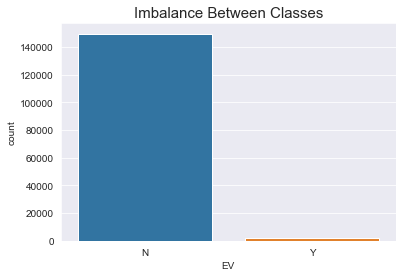

In [142]:
# Set target and feature variables (add your own here)
target = "EV"
features = ["bill_1_2021","bill_2_2021","bill_3_2021","bill_4_2021",
            "bill_5_2021","bill_6_2021","bill_1_2022","bill_2_2022",
            "bill_3_2022","bill_4_2022","bill_5_2022","bill_6_2022","bill_1_2023"]

# Separate the target from the features
y = EV_df[target]
X = EV_df[features]

# Split the data into train and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=142)

# # X_train: This is an array containing the training set input features.
# # X_test: This is an array containing the test set input features.
# # y_train: This is an array containing the training set target variable.
# # y_test: This is an array containing the test set target variable.

# Plot the counts of the 
sns.countplot(x=y_train) 
plt.title("Imbalance Between Classes", size=15)
plt.show()

In [143]:
#Total no of N and Y present in the dataset before splitting.
from collections import Counter
print(sorted(Counter(EV_df['EV']).items()))

[('N', 182300), ('Y', 2352)]


In [144]:
# Get the lengths of the datasets
X_train_len = len(X_train)
y_train_len = len(y_train)
X_test_len = len(X_test)
y_test_len = len(y_test)

# Create a table with the lengths
table = [['X_train', X_train_len], ['X_test', X_test_len],['y_train', y_train_len],['y_test', y_test_len]]

# Print the table
print(tabulate(table, headers=['Data', 'Length']))


Data       Length
-------  --------
X_train    151414
X_test      33238
y_train    151414
y_test      33238


In [157]:
num_yes = y_train.value_counts()['Y']
print("The number of 'YES' in the training data is = ",num_yes)

The number of 'YES' in the training data is =  1926


In [158]:
num_no = y_train.value_counts()['N']
print("The number of 'NO' in the training data is = ",num_no)

The number of 'NO' in the training data is =  149488


In [159]:
num_yes12 = y_test.value_counts()['Y']
print("The number of 'YES' in the testing data is = ",num_yes12)

The number of 'YES' in the testing data is =  426


In [160]:
num_no12 = y_test.value_counts()['N']
print("The number of 'NO' in the testing data is = ",num_no12)

The number of 'NO' in the testing data is =  32812


In [167]:
def plot_resample(X, y, X_res, y_res, method):    
    # Create subplots
    fig, axes = plt.subplot_mosaic([ ['c', 'd']])

    sns.countplot(y=y, ax=axes['c'])
    sns.countplot(y=y_res, ax=axes['d'])
# Set titles and show plot
    plt.suptitle(method + ' Outcomes')
    axes['c'].title.set_text('Original Class Proportions')
    axes['d'].title.set_text(method + ' Class Proportions')
    plt.tight_layout()
    plt.show()

In [ ]:
#pip install imblearn

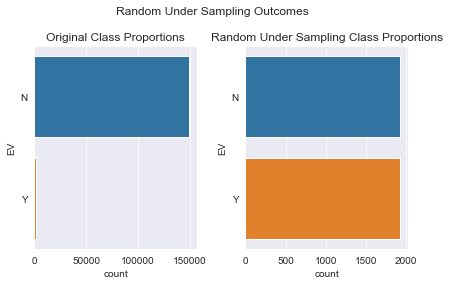

In [168]:
# Instantiating the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Resamples the training data to balance the classes
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

# The function first randomly selects a subset of the majority class (the class with more examples) 
# such that its size matches that of the minority class (the class with fewer examples).
# This results in a resampled version of the training data where the classes are balanced.

# View the resampled labels
plot_resample(X_train, y_train, X_train_res, y_train_res, "Random Under Sampling")

In [169]:
# Get the lengths of the datasets
X_train_len = len(X_train)
y_train_len = len(y_train)
X_train_resampled_len = len(X_train_res)
y_train_resampled_len = len(y_train_res)

# Create a table with the lengths
table = [['X_train', X_train_len], ['X_train_resampled', X_train_resampled_len],['y_train', y_train_len],  ['y_train_resampled', y_train_resampled_len]]

# Print the table
print(tabulate(table, headers=['Data', 'Length']))

Data                 Length
-----------------  --------
X_train              151414
X_train_resampled      3852
y_train              151414
y_train_resampled      3852


In [163]:
num_yes1 = y_train_res.value_counts()['Y']
print("The no of 'YES' after resampling is = ",num_yes1)
#In the training data above we saw that the no of "YES" were 1926 and thus after resampling, the function returns the same number.

The no of 'YES' after resampling is =  1926


In [164]:
num_no1 = y_train_res.value_counts()['N']
print("The no of 'NO' after resampling is = ",num_no1)

The no of 'NO' after resampling is =  1926


In [153]:
# Instantiate the classifier
model = GaussianNB()

# Fit the classifier to the resampled data
model.fit(X_train_res,y_train_res)
# Using the resampled data to train our Naive Bayes model

# Make predictions on the test set
y_pred = model.predict(X_test)
#  predicts the output labels for a set of input features X_test 
# using the trained machine learning model model, and assigns the predicted labels to the variable y_pred.

In [154]:
# Calculate and print the accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Classification report:\n{report}")

Accuracy: 0.8489379625729586
Classification report:
              precision    recall  f1-score   support

           N       0.99      0.85      0.92     32812
           Y       0.04      0.48      0.08       426

    accuracy                           0.85     33238
   macro avg       0.52      0.67      0.50     33238
weighted avg       0.98      0.85      0.91     33238



In [155]:
print(confusion_matrix(y_test, y_pred).ravel())
# TP: the number of individuals who have an EV and were correctly identified by the model as having an EV
# FP: the number of individuals who do not have an EV but were incorrectly identified by the model as having an EV
# TN: the number of individuals who do not have an EV and were correctly identified by the model as not having an EV
# FN: the number of individuals who have an EV but were incorrectly identified by the model as not having an EV
# (tn, fp, fn, tp)

[28011  4801   220   206]


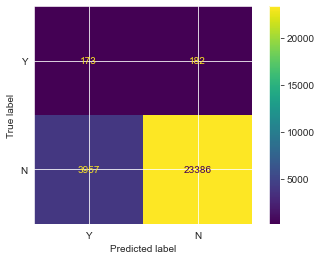

In [141]:
labels = ['Y','N']
cm1 = confusion_matrix(y_test, y_pred,labels = labels)
# cm1
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=labels)
disp.plot();

In [90]:
# create a new column in the X_test data to store the predictions
X_test['predicted_EVs'] = y_pred


# Filter the test set to include only the individuals predicted to be EV owners
ev_owners = X_test[X_test['predicted_EVs'] == 'Y']
ev_owners

,bill_1_2021,bill_2_2021,bill_3_2021,bill_4_2021,bill_5_2021,bill_6_2021,bill_1_2022,bill_2_2022,bill_3_2022,bill_4_2022,bill_5_2022,bill_6_2022,bill_1_2023,predicted_EVs
59638,1546.0,0.0,697.0,792.0,1045.0,1390.0,1408.0,0.0,1428.0,1261.0,2383.0,1473.0,0.0,Y
159476,1923.0,1152.0,1523.0,1828.0,1718.0,2058.0,1881.0,1993.0,1325.0,1169.0,259.0,878.0,1251.0,Y
95544,1613.0,1422.0,1120.0,0.0,2170.0,1194.0,1321.0,0.0,2307.0,0.0,1728.0,1004.0,0.0,Y
91225,0.0,3147.0,1173.0,956.0,1148.0,1021.0,2276.0,0.0,2002.0,750.0,850.0,1311.0,1794.0,Y
15377,0.0,0.0,0.0,1388.0,764.0,2559.0,2513.0,0.0,4278.0,957.0,811.0,2060.0,2106.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159324,0.0,0.0,0.0,0.0,495.0,821.0,0.0,516.0,3189.0,130.0,0.0,860.0,719.0,Y
28636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4639.0,Y
111427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1318.0,291.0,445.0,1311.0,3599.0,Y
124829,4750.0,0.0,2481.0,1844.0,859.0,2397.0,3132.0,2780.0,1995.0,0.0,2112.0,1828.0,4216.0,Y


In [65]:
# Get the indexes of the EV owners in X_test
ev_owner_indexes = ev_owners.index

# Use the indexes to select the corresponding rows in the other dataset
ev_owner_data = EV_df.loc[ev_owner_indexes]
ev_owner_data

,accountID,EV,bill_1_2021,bill_2_2021,bill_3_2021,bill_4_2021,bill_5_2021,bill_6_2021,bill_1_2022,bill_2_2022,bill_3_2022,bill_4_2022,bill_5_2022,bill_6_2022,bill_1_2023
59638,59638,N,1546.0,0.0,697.0,792.0,1045.0,1390.0,1408.0,0.0,1428.0,1261.0,2383.0,1473.0,0.0
159476,159476,N,1923.0,1152.0,1523.0,1828.0,1718.0,2058.0,1881.0,1993.0,1325.0,1169.0,259.0,878.0,1251.0
95544,95544,N,1613.0,1422.0,1120.0,0.0,2170.0,1194.0,1321.0,0.0,2307.0,0.0,1728.0,1004.0,0.0
91225,91225,N,0.0,3147.0,1173.0,956.0,1148.0,1021.0,2276.0,0.0,2002.0,750.0,850.0,1311.0,1794.0
15377,15377,N,0.0,0.0,0.0,1388.0,764.0,2559.0,2513.0,0.0,4278.0,957.0,811.0,2060.0,2106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59943,59943,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4047.0
144447,144447,N,0.0,0.0,2389.0,1066.0,871.0,1185.0,1760.0,1618.0,1448.0,939.0,818.0,764.0,1269.0
96014,96014,N,1974.0,1666.0,1294.0,381.0,773.0,1174.0,2334.0,1551.0,980.0,513.0,515.0,651.0,1663.0
53791,53791,N,794.0,610.0,704.0,1255.0,0.0,2837.0,1179.0,977.0,730.0,542.0,546.0,661.0,2035.0
